In [2]:
import sys
sys.path.append('../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio
from PIL import Image
from data.dataset import SegmentDataset
from data.transforms import transform
from utils.vis import showImageMask
from utils.parameters import color2index
from torch.utils.data import DataLoader
from utils.utils import pointAnomaly
from metrics.metrics import pixelAccuracy

In [4]:
dataset = SegmentDataset(annot='../assets/train_sample.txt', transform=transform)
print(len(dataset))

18


In [5]:
_, mask_path, _, _ = dataset[0]

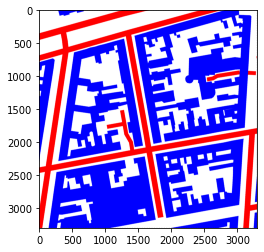

In [6]:
mask = cv2.imread(mask_path)
# print(np.unique(mask))
plt.imshow(mask)
plt.show()

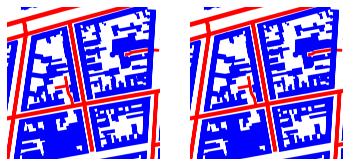

In [7]:
def processMask(mask, use_path=False, bake_anomaly=True):
    '''
        Args:
            masks: (h, w, 3)
            use_path: To use path of mask
    '''
    if use_path:
        mask = cv2.imread(mask_path)

    # Put labels
    for k in color2index:
        mask[(mask == k).all(axis=2)] = color2index[k]
    mask = mask[:, :, 0]
    # Set all the anomalies to background
    if bake_anomaly:
        anomaly_mask = np.logical_and.reduce([mask!=val for _, val in color2index.items()])
        mask[anomaly_mask] = 0
    return Image.fromarray(mask)

def pointAnomaly(mask, use_path=True, allow=[0, 255]):
    '''
        Shows if the mask contains abnormal numbers
    '''
    
    if use_path:
        mask = cv2.imread(mask)
    all_val = set(np.unique(mask))-set(allow)
    mask_anomaly = np.logical_and((mask!=allow[0]), (mask!=allow[1]))
    print(type(mask_anomaly))
    return mask_anomaly.astype(np.int)

def changeAnomaly(mask, use_path=True, allow=[0, 255], change_to=0):
    if use_path:
        mask = cv2.imread(mask)
    mask_mask = np.logical_and(mask!=allow[0], mask!=allow[1])
    mask[mask_mask] = 0
#     mask[mask!=allow[0] or mask!=allow[1]] = 0
    return mask

# After setting all anomalies to background, mask looks the same
mask = cv2.imread(mask_path)
showImageMask(mask, changeAnomaly(mask, use_path=False), use_path=False)

# mask_anomaly = pointAnomaly(mask_path)
# print(np.prod(mask_anomaly.shape))
# print(np.count_nonzero(mask_anomaly))
# print(mask_anomaly.count())
# plt.imshow(mask_anomaly)
# mask = imageio.imread(mask_path)
# print(mask.shape)
# np.unique(mask)

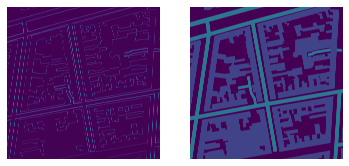

Match : , 0.9740817422118013


In [8]:
mask_prev = cv2.imread(mask_path)
mask_anomaly = processMask(mask_prev, bake_anomaly=False)
mask_no_anomaly = processMask(mask_prev, bake_anomaly=True)

showImageMask(mask_anomaly, mask_no_anomaly, use_path=False, debug=True)
print("Match : , {}".format(pixelAccuracy(np.array(mask_anomaly), np.array(mask_no_anomaly))))